# Dataset

The arXiv dataset is around 4GB so it is not included in the data. Only final dataframes are included (one for NLP topics and the other one for climate-change)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_parquet('C:/Users/darja/WiNS collabathon/arxiv-metadata-oai-snapshot.parquet',engine='pyarrow')

try saving it as parquet

In [4]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


The data has over 2million rows/articles!

In [29]:
df.shape

(2246567, 14)

What info do we have?

In [32]:
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

# Fetching climate change and NLP data

We iterate through abstracts and titles to get the rows of the articles that have "climate change" and "global warming" phrases.


In [37]:
climate_ids=[]
for id,abs in enumerate(df['abstract'].str.lower()): #we convert the text to lowercase so we dont have to worry about that
    if 'climate change' in abs or 'global warming' in abs:    
        climate_ids.append(id)
#print(climate_ids)
print("Number of climate change/global warming abstracts:",len(climate_ids))

climate_ids_titles=[]
for id,tit in enumerate(df['title'].str.lower()): #we convert the text to lowercase so we dont have to worry about that
    if 'climate change' in tit or 'global warming' in tit:    
        climate_ids_titles.append(id)
        
print("Number of climate change/global warming titles:",len(climate_ids_titles))

[2781,
 12307,
 12406,
 20987,
 27142,
 27905,
 36612,
 43308,
 44197,
 52142,
 52999,
 53719,
 54058,
 54213,
 56189,
 58217,
 59598,
 59764,
 61718,
 63285,
 63552,
 66728,
 69431,
 71594,
 73581,
 79349,
 85704,
 90554,
 91828,
 98514,
 99314,
 101757,
 103235,
 111871,
 122280,
 122300,
 123623,
 125515,
 127437,
 129934,
 131858,
 133154,
 133815,
 134900,
 141347,
 142181,
 144068,
 146681,
 148118,
 164070,
 164749,
 170276,
 173989,
 175636,
 176060,
 177361,
 186949,
 192179,
 194826,
 195607,
 205099,
 210457,
 217992,
 220225,
 220279,
 221446,
 224376,
 228484,
 232706,
 235186,
 238312,
 238321,
 242993,
 246257,
 247437,
 248921,
 249933,
 252226,
 252710,
 253615,
 256257,
 256785,
 259275,
 259437,
 260233,
 260405,
 261106,
 265106,
 266900,
 269784,
 270159,
 270572,
 279085,
 279764,
 280215,
 282988,
 285777,
 290731,
 292671,
 292873,
 293145,
 304035,
 313288,
 325748,
 330445,
 333548,
 334748,
 337069,
 342570,
 344766,
 347321,
 349412,
 351102,
 351928,
 35193

Join the dataframes from titles and abastracts:

In [48]:
df_titles=df.iloc[climate_ids_titles]
df_abs=df.iloc[climate_ids]

df_all_climate = pd.concat([df_titles,df_abs])
df_all_climate.drop_duplicates('id',inplace=True)
df_all_climate.reset_index(inplace=True,drop=True)

df_all_climate


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0706.3621,Gerald Marsh,Gerald E. Marsh,Climate Change: The Sun's Role,"16 pages, 8 figures, 1 table",None,None,None,physics.gen-ph,None,The sun's role in the earth's recent warming...,"[{'version': 'v1', 'created': 'Sat, 23 Jun 200...",2010-07-29,"[[Marsh, Gerald E., ]]"
1,0706.3720,James Hansen,J. Hansen (Columbia Univ. Earth Institute),How Can We Avert Dangerous Climate Change?,"18 pages, 7 figures; revised and expanded from...",None,None,None,physics.ao-ph,None,Recent analyses indicate that the amount of ...,"[{'version': 'v1', 'created': 'Mon, 25 Jun 200...",2007-06-27,"[[Hansen, J., , Columbia Univ. Earth Institute]]"
2,0706.4294,Terry Sloan,"T.Sloan, A W Wolfendale",Cosmic Rays and Global Warming,Submitted to ICRC 2007,None,None,None,astro-ph physics.ao-ph physics.geo-ph physics....,None,It has been claimed by others that observed ...,"[{'version': 'v1', 'created': 'Thu, 28 Jun 200...",2007-07-11,"[[Sloan, T., ], [Wolfendale, A W, ]]"
3,0803.1239,Serge Galam,Serge Galam,Global Warming: the Sacrificial Temptation,"14 pages, no figure",None,None,None,physics.soc-ph physics.pop-ph,http://arxiv.org/licenses/nonexclusive-distrib...,The claimed unanimity of the scientific comm...,"[{'version': 'v1', 'created': 'Mon, 10 Mar 200...",2008-03-11,"[[Galam, Serge, ]]"
4,0804.3319,Ignacio Gallo,"Federico Gallo, Pierluigi Contucci, Adam Coutt...",Tackling climate change through energy efficie...,None,None,None,None,physics.soc-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Promoting and increasing energy efficiency i...,"[{'version': 'v1', 'created': 'Mon, 21 Apr 200...",2009-09-29,"[[Gallo, Federico, ], [Contucci, Pierluigi, ],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,physics/0610115,Robert Schmunk,"J. Hansen, M. Sato, R. Ruedy, P. Kharecha, A. ...",Dangerous human-made interference with climate...,21 pages; 10 figures; to be submitted to Atmos...,Rev. text publ. in Atmospheric Chemistry and P...,10.5194/acp-7-2287-2007,None,physics.ao-ph physics.geo-ph,None,"We investigate the issue of ""dangerous human...","[{'version': 'v1', 'created': 'Mon, 16 Oct 200...",2020-11-04,"[[Hansen, J., ], [Sato, M., ], [Ruedy, R., ], ..."
1584,physics/0612094,James Annan,J. D. Annan and J. C. Hargreaves,Can we believe in high climate sensitivity?,None,None,None,None,physics.ao-ph,None,The climate response to anthropogenic forcin...,"[{'version': 'v1', 'created': 'Mon, 11 Dec 200...",2007-05-23,"[[Annan, J. D., ], [Hargreaves, J. C., ]]"
1585,physics/0612145,Henrik Svensmark Dr,Henrik Svensmark,The Antarctic climate anomaly and galactic cos...,None,None,None,None,physics.ao-ph physics.space-ph,None,It has been proposed that galactic cosmic ra...,"[{'version': 'v1', 'created': 'Thu, 14 Dec 200...",2007-05-23,"[[Svensmark, Henrik, ]]"
1586,physics/0612222,Valerio Lucarini,"Valerio Lucarini, Robert Danihlik, Ida Krieger...",Does the Danube exist? Versions of reality giv...,"25 pages 8 figures, 5 tables","J. Geophys. Res., 112, D13103 (2007)",10.1029/2006JD008360,None,physics.ao-ph physics.data-an physics.geo-ph p...,None,We present an intercomparison and verificati...,"[{'version': 'v1', 'created': 'Fri, 22 Dec 200...",2011-10-11,"[[Lucarini, Valerio, ], [Danihlik, Robert, ], ..."


Save the dataset as parquet for efficiency:

In [53]:
df_all_climate.to_parquet('project_data/arxiv_climate_change.parquet',engine='pyarrow')

We realised it is easier to join the title and the abstract columns in one column and then iterate through it and have everythin ready at the same time:

In [57]:
df['joined']=df['title']+' '+df['abstract']
df['joined']

0          Calculation of prompt diphoton production cros...
1          Sparsity-certifying Graph Decompositions   We ...
2          The evolution of the Earth-Moon system based o...
3          A determinant of Stirling cycle numbers counts...
4          From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...
                                 ...                        
2246562    On the origin of the irreversibility line in t...
2246563    Nonlinear Response of HTSC Thin Film Microwave...
2246564    Critical State Flux Penetration and Linear Mic...
2246565    Density of States and NMR Relaxation Rate in A...
2246566    Ginzburg Landau theory for d-wave pairing and ...
Name: joined, Length: 2246567, dtype: object

So this loop will grab both the results from titles and abstracts:

In [58]:
nlp_ids_titles=[]
for id,search in enumerate(df['joined'].str.lower()): #we convert the text to lowercase so we dont have to worry about that
    if 'nlp' in search or "natural language processing" in search:   
        nlp_ids_titles.append(id)

print("The number of articles containting nlp as topics: ",len(nlp_ids_titles))


[3664,
 13061,
 16717,
 26714,
 29470,
 31705,
 35800,
 36020,
 41219,
 43783,
 54074,
 66936,
 69800,
 77343,
 80416,
 80972,
 84822,
 87229,
 92612,
 95765,
 98314,
 101455,
 101779,
 111293,
 111589,
 122831,
 124914,
 138964,
 142202,
 148871,
 159137,
 161571,
 163498,
 169561,
 171240,
 171854,
 175831,
 179956,
 185123,
 193136,
 196110,
 197062,
 198315,
 211273,
 218899,
 219565,
 225950,
 226780,
 240907,
 247666,
 250853,
 251358,
 257483,
 257875,
 261195,
 262129,
 263579,
 265855,
 270943,
 272018,
 275289,
 283804,
 284332,
 285888,
 286496,
 286689,
 289274,
 289288,
 290709,
 291544,
 292700,
 293522,
 297028,
 298795,
 299622,
 300635,
 301389,
 301698,
 303529,
 304501,
 309527,
 314060,
 315887,
 316720,
 328586,
 328870,
 328943,
 330547,
 332204,
 332402,
 332507,
 337631,
 338363,
 338624,
 338626,
 338797,
 340780,
 343299,
 343945,
 346593,
 347410,
 349357,
 351051,
 352131,
 353357,
 353459,
 355587,
 355829,
 356932,
 357585,
 358959,
 359814,
 364651,
 3684

We make the dataframe from the NLP topics and save it as .parquet

In [60]:
# we make a dataframe for the NLP topics
df_all_nlp = df.iloc[nlp_ids_titles]
df_all_nlp.drop_duplicates('id',inplace=True)
df_all_nlp.reset_index(inplace=True,drop=True)

df_all_nlp


C:\Users\darja\AppData\Local\Temp/ipykernel_14016/925514299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_nlp.drop_duplicates('id',inplace=True)


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,joined
0,0704.3665,Tian-Jian Jiang,"Mike Tian-Jian Jiang, Deng Liu, Meng-Juei Hsie...",On the Development of Text Input Method - Less...,10 pages,None,None,None,cs.CL cs.HC,None,Intelligent Input Methods (IM) are essential...,"[{'version': 'v1', 'created': 'Fri, 27 Apr 200...",2007-05-23,"[[Jiang, Mike Tian-Jian, ], [Liu, Deng, ], [Hs...",On the Development of Text Input Method - Less...
1,0706.4375,Thierry Hamon,"Thierry Hamon (LIPN), Adeline Nazarenko (LIPN)...",A Robust Linguistic Platform for Efficient and...,None,Proceedings of RIAO 2007 (30/05/2007),None,None,cs.AI,None,Web semantic access in specific domains call...,"[{'version': 'v1', 'created': 'Fri, 29 Jun 200...",2007-07-02,"[[Hamon, Thierry, , LIPN], [Nazarenko, Adeline...",A Robust Linguistic Platform for Efficient and...
2,0707.3547,Alberto Bernacchia,"Alberto Bernacchia, Philippe Naveau, Mathieu V...",Detecting spatial patterns with the cumulant f...,"15 pages, 7 figures",None,10.5194/npg-15-169-2008,None,physics.data-an physics.geo-ph,None,The spatial coherence of a measured variable...,"[{'version': 'v1', 'created': 'Tue, 24 Jul 200...",2020-01-29,"[[Bernacchia, Alberto, ], [Naveau, Philippe, ]...",Detecting spatial patterns with the cumulant f...
3,0709.4449,Bouetou Bouetou Thomas,"Kuetche Kamgang Victor, Bouetou Bouetou Thomas...",On soliton structure of higher order (2+1)-dim...,4 pages,None,None,None,math-ph math.MP,None,We investigate the soliton structure of nove...,"[{'version': 'v1', 'created': 'Thu, 27 Sep 200...",2007-09-28,"[[Victor, Kuetche Kamgang, ], [Thomas, Bouetou...",On soliton structure of higher order (2+1)-dim...
4,0710.2523,John Lin,"J. M. Lin, J. W. Bohland, P. Andrews, G. Burns...",An analysis of the abstracts presented at the ...,None,None,10.1371/journal.pone.0002052,None,physics.data-an q-bio.NC,None,We extracted and processed abstract data fro...,"[{'version': 'v1', 'created': 'Fri, 12 Oct 200...",2015-05-13,"[[Lin, J. M., ], [Bohland, J. W., ], [Andrews,...",An analysis of the abstracts presented at the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,cs/9906014,Gertjan van Noord,Gert Veldhuijzen van Zanten and Gosse Bouma an...,Evaluation of the NLP Components of the OVIS2 ...,Proceedings of CLIN 99,None,None,None,cs.CL,None,The NWO Priority Programme Language and Spee...,"[{'version': 'v1', 'created': 'Mon, 14 Jun 199...",2007-05-23,"[[van Zanten, Gert Veldhuijzen, ], [Bouma, Gos...",Evaluation of the NLP Components of the OVIS2 ...
9774,cs/9909002,Vincenzo Pallotta,Afzal Ballim and Vincenzo Pallotta,Semantic robust parsing for noun extraction fr...,None,Proceedings of WPDI'99 (Workshop on Procedures...,None,None,cs.CL,None,This paper describes how robust parsing tech...,"[{'version': 'v1', 'created': 'Thu, 2 Sep 1999...",2007-05-23,"[[Ballim, Afzal, ], [Pallotta, Vincenzo, ]]",Semantic robust parsing for noun extraction fr...
9775,cs/9912009,Schwitter,Michael Hess,Deduction over Mixed-Level Logic Representatio...,"8 pages, Proceedings of the Eighth Internation...","IEEE Computer Society Press, 1996. 383-390",10.1109/TAI.1996.560480,None,cs.CL,None,A system is described that uses a mixed-leve...,"[{'version': 'v1', 'created': 'Wed, 15 Dec 199...",2016-11-15,"[[Hess, Michael, ]]",Deduction over Mixed-Level Logic Representatio...
9776,cs/9912017,Schwitter,Michael Hess,Mixed-Level Knowledge Representation and Varia...,29 pages,International Journal on Artificial Intelligen...,None,None,cs.CL,None,A system is described that uses a mixed-leve...,"[{'version': 'v1', 'created': 'Thu, 23 Dec 199...",2007-05-23,"[[Hess, Michael, ]]",Mixed-Level Knowledge Representation and Varia...


In [62]:
df_all_nlp.to_parquet('project_data/arxiv_nlp.parquet',engine='pyarrow')

# Exploratory analysis

In [3]:
# reading rather than generating again (Darja complicated things for herself again):
df_all_nlp = pd.read_parquet('project_data/arxiv_nlp.parquet',engine='pyarrow')
df_all_climate = pd.read_parquet('project_data/arxiv_climate_change.parquet',engine='pyarrow')

In [4]:
df_all_nlp

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,joined
0,0704.3665,Tian-Jian Jiang,"Mike Tian-Jian Jiang, Deng Liu, Meng-Juei Hsie...",On the Development of Text Input Method - Less...,10 pages,None,None,None,cs.CL cs.HC,None,Intelligent Input Methods (IM) are essential...,"[{'created': 'Fri, 27 Apr 2007 05:58:32 GMT', ...",2007-05-23,"[[Jiang, Mike Tian-Jian, ], [Liu, Deng, ], [Hs...",On the Development of Text Input Method - Less...
1,0706.4375,Thierry Hamon,"Thierry Hamon (LIPN), Adeline Nazarenko (LIPN)...",A Robust Linguistic Platform for Efficient and...,None,Proceedings of RIAO 2007 (30/05/2007),None,None,cs.AI,None,Web semantic access in specific domains call...,"[{'created': 'Fri, 29 Jun 2007 08:58:02 GMT', ...",2007-07-02,"[[Hamon, Thierry, , LIPN], [Nazarenko, Adeline...",A Robust Linguistic Platform for Efficient and...
2,0707.3547,Alberto Bernacchia,"Alberto Bernacchia, Philippe Naveau, Mathieu V...",Detecting spatial patterns with the cumulant f...,"15 pages, 7 figures",None,10.5194/npg-15-169-2008,None,physics.data-an physics.geo-ph,None,The spatial coherence of a measured variable...,"[{'created': 'Tue, 24 Jul 2007 14:53:13 GMT', ...",2020-01-29,"[[Bernacchia, Alberto, ], [Naveau, Philippe, ]...",Detecting spatial patterns with the cumulant f...
3,0709.4449,Bouetou Bouetou Thomas,"Kuetche Kamgang Victor, Bouetou Bouetou Thomas...",On soliton structure of higher order (2+1)-dim...,4 pages,None,None,None,math-ph math.MP,None,We investigate the soliton structure of nove...,"[{'created': 'Thu, 27 Sep 2007 16:39:30 GMT', ...",2007-09-28,"[[Victor, Kuetche Kamgang, ], [Thomas, Bouetou...",On soliton structure of higher order (2+1)-dim...
4,0710.2523,John Lin,"J. M. Lin, J. W. Bohland, P. Andrews, G. Burns...",An analysis of the abstracts presented at the ...,None,None,10.1371/journal.pone.0002052,None,physics.data-an q-bio.NC,None,We extracted and processed abstract data fro...,"[{'created': 'Fri, 12 Oct 2007 17:27:21 GMT', ...",2015-05-13,"[[Lin, J. M., ], [Bohland, J. W., ], [Andrews,...",An analysis of the abstracts presented at the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,cs/9906014,Gertjan van Noord,Gert Veldhuijzen van Zanten and Gosse Bouma an...,Evaluation of the NLP Components of the OVIS2 ...,Proceedings of CLIN 99,None,None,None,cs.CL,None,The NWO Priority Programme Language and Spee...,"[{'created': 'Mon, 14 Jun 1999 10:06:31 GMT', ...",2007-05-23,"[[van Zanten, Gert Veldhuijzen, ], [Bouma, Gos...",Evaluation of the NLP Components of the OVIS2 ...
9774,cs/9909002,Vincenzo Pallotta,Afzal Ballim and Vincenzo Pallotta,Semantic robust parsing for noun extraction fr...,None,Proceedings of WPDI'99 (Workshop on Procedures...,None,None,cs.CL,None,This paper describes how robust parsing tech...,"[{'created': 'Thu, 2 Sep 1999 15:53:07 GMT', '...",2007-05-23,"[[Ballim, Afzal, ], [Pallotta, Vincenzo, ]]",Semantic robust parsing for noun extraction fr...
9775,cs/9912009,Schwitter,Michael Hess,Deduction over Mixed-Level Logic Representatio...,"8 pages, Proceedings of the Eighth Internation...","IEEE Computer Society Press, 1996. 383-390",10.1109/TAI.1996.560480,None,cs.CL,None,A system is described that uses a mixed-leve...,"[{'created': 'Wed, 15 Dec 1999 11:02:22 GMT', ...",2016-11-15,"[[Hess, Michael, ]]",Deduction over Mixed-Level Logic Representatio...
9776,cs/9912017,Schwitter,Michael Hess,Mixed-Level Knowledge Representation and Varia...,29 pages,International Journal on Artificial Intelligen...,None,None,cs.CL,None,A system is described that uses a mixed-leve...,"[{'created': 'Thu, 23 Dec 1999 15:48:26 GMT', ...",2007-05-23,"[[Hess, Michael, ]]",Mixed-Level Knowledge Representation and Varia...


In [4]:
df_all_nlp.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed', 'joined'],
      dtype='object')

Convert the date columns to DateTime format and keep only the year

In [5]:
df_all_nlp['update_date']=pd.to_datetime(df_all_nlp['update_date'])
df_all_nlp['update_date']=[date.year for date in df_all_nlp['update_date']]

df_all_climate['update_date']=pd.to_datetime(df_all_climate['update_date'])
df_all_climate['update_date']=[date.year for date in df_all_climate['update_date']]

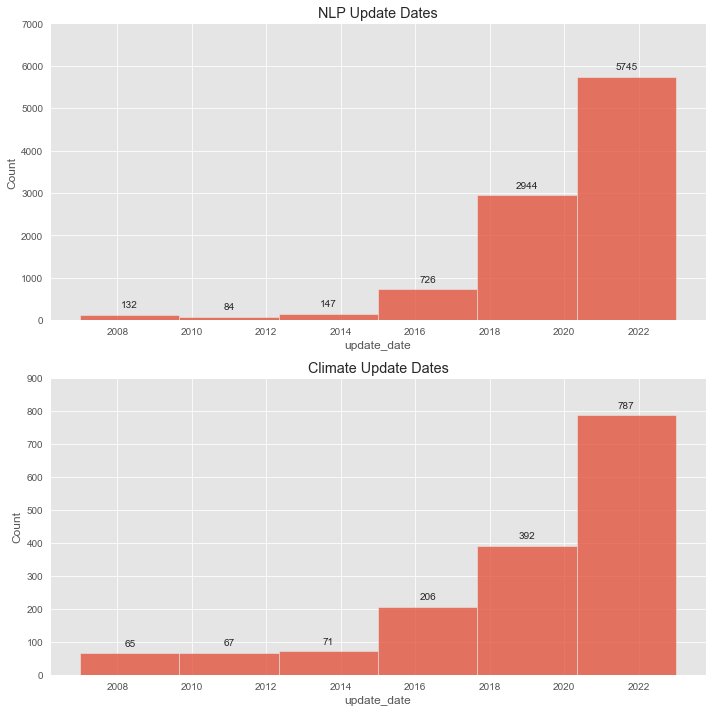

In [26]:
sns.set_style('whitegrid')
plt.style.use('ggplot')

fig,axs = plt.subplots(2,1,figsize=(10,10))

nbins=6
# Plot the first histogram
sns.histplot(data=df_all_nlp['update_date'], ax=axs[0], bins=nbins)
axs[0].set_title('NLP Update Dates')

# Add numbers on top of the bars in the first histogram
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Plot the second histogram
sns.histplot(data=df_all_climate['update_date'], ax=axs[1], bins=nbins)
axs[1].set_title('Climate Update Dates')

# Add numbers on top of the bars in the second histogram
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

axs[0].set_ylim(0,7000)
axs[1].set_ylim(0,900)
# Adjust the layout
plt.tight_layout()

In [13]:
df['update_date']

0          2008
1          2008
2          2008
3          2007
4          2013
           ... 
2246562    2009
2246563    2016
2246564    2009
2246565    2009
2246566    2009
Name: update_date, Length: 2246567, dtype: int64

In [21]:
df['update_date']=pd.to_datetime(df['update_date'])
df['update_date']=[date.year for date in df['update_date']]

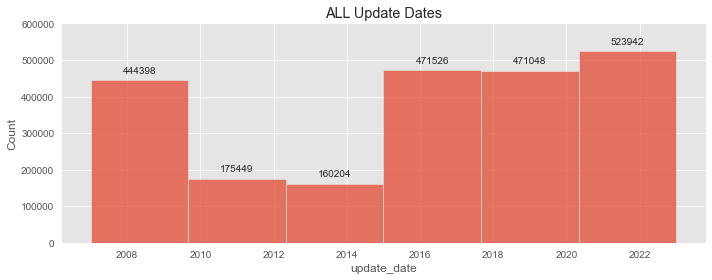

In [24]:


fig,axs = plt.subplots(1,1,figsize=(10,4))

nbins=6
# Plot the first histogram
sns.histplot(data=df['update_date'], ax=axs, bins=nbins)
axs.set_title('ALL Update Dates')

# Add numbers on top of the bars in the first histogram
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
axs.set_ylim(0,600000)
# Adjust the layout
plt.tight_layout()

Kernel(probability) density plots, a bit redundant and not the most intuitive but here they are:

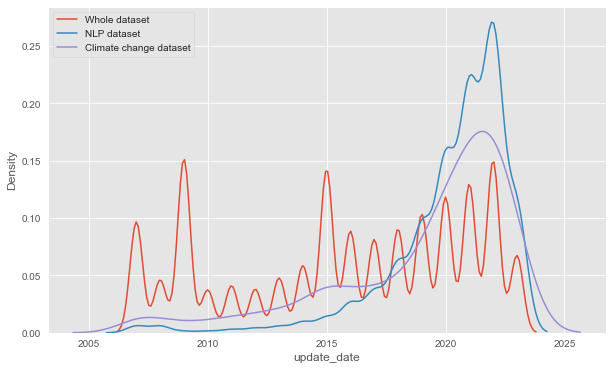

In [30]:
fig,ax=plt.subplots(figsize=(10,6))

sns.kdeplot(df['update_date'],ax=ax,label='Whole dataset')
sns.kdeplot(df_all_nlp['update_date'],ax=ax,label='NLP dataset')
sns.kdeplot(df_all_climate['update_date'],ax=ax,label='Climate change dataset')
plt.legend()


Next is the function to count the percentage of each year occurenc in a given dataset. Then the percentage dataframe is created for the ease of plotting.

In [45]:
def percentages(df):
    size = df.shape[0]
    value_counts = df['update_date'].value_counts()
    perc = value_counts/size*100
    return perc

perc_df = pd.DataFrame()

perc_df['All']=percentages(df)
perc_df['NLP']=percentages(df_all_nlp)
perc_df['Climate']=percentages(df_all_climate)

perc_df.sort_index(inplace=True) #so the years/rows are in an ascending order
perc_df


,All,NLP,Climate
update_date,,,
2009,10.196936,0.132952,0.881612
2022,10.083652,26.600532,21.599496
2015,9.578081,1.319288,5.289673
2021,8.713339,21.108611,17.380353
2020,7.939937,15.023522,13.035264
2019,6.952297,9.132747,7.619647
2007,6.496891,0.613622,1.952141
2018,6.075225,5.952137,4.030227
2016,5.950902,2.566987,3.337531


And finally, we plot the percentages, for the whole dataset, the NLP part, and the climate change part to get a better insight of the distributions. It seems like in both NLP and climate change there indeed was probably a rise in interest, because percentages of articles for the whole dataset remain almost(yes, roughly, but ALMOST) static. This could also be a hint that we are on the right track :)

C:\Users\darja\AppData\Local\Temp/ipykernel_11860/3724676643.py:4: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(perc_df,ax=ax, dashes=False,markers='o')


Text(0, 0.5, 'Percentage')

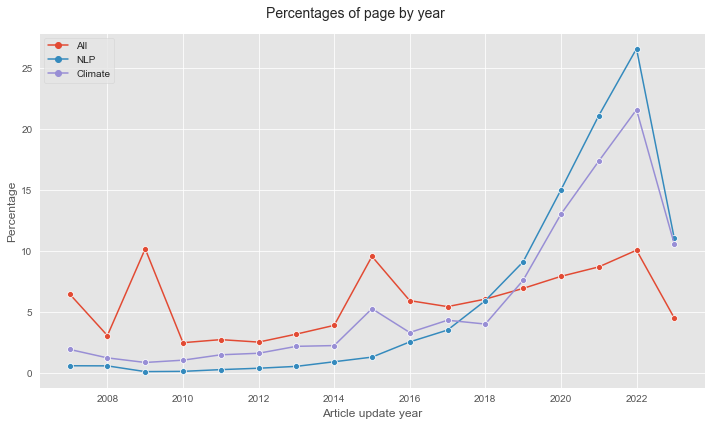

In [70]:
fig,ax = plt.subplots(figsize=(10,6))
fig.suptitle('Percentages of page by year',size=14)
fig.set_tight_layout(True)
sns.lineplot(perc_df,ax=ax, dashes=False,markers='o')
ax.set_xlabel('Article update year')
ax.set_ylabel('Percentage')

## Categories and subcategories

'categories' are in the shape of `main_category.subcategory` (for example `cs.AI`), so we do the following thing.

We split the 'categories' column which can have multiple entries/categores so that we have only 1 category per article and 1 subcategory.(we use the first one that appears, for simplicity and mostly because the main_categories in multiple entries are the same)

In [111]:
def cats_subcats(df): #function that splits 'categories' column and adds 'main_category' and 'subcategory' columns to desired dataframe
    
    df['main_category'] = [c[0] for c in df['categories'].str.split('.')]
    
    subcats=[]
    for c in df['categories'].str.split('.'):
        if len(c)!=1:
            subcats.append(c[1])
        else:
            subcats.append(c[0]) 
    #df['subcategory']=[c[1] for c in df['categories'].str.split('.') if len(c)!=1 else c[0]]
    df['subcategory'] = subcats
    return df


In [125]:
cats_subcats(df_all_nlp)
cats_subcats(df_all_climate)


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,main_category,subcategory
0,0706.3621,Gerald Marsh,Gerald E. Marsh,Climate Change: The Sun's Role,"16 pages, 8 figures, 1 table",None,None,None,physics.gen-ph,None,The sun's role in the earth's recent warming...,"[{'created': 'Sat, 23 Jun 2007 18:43:00 GMT', ...",2010,"[[Marsh, Gerald E., ]]",physics,gen-ph
1,0706.3720,James Hansen,J. Hansen (Columbia Univ. Earth Institute),How Can We Avert Dangerous Climate Change?,"18 pages, 7 figures; revised and expanded from...",None,None,None,physics.ao-ph,None,Recent analyses indicate that the amount of ...,"[{'created': 'Mon, 25 Jun 2007 23:59:51 GMT', ...",2007,"[[Hansen, J., , Columbia Univ. Earth Institute]]",physics,ao-ph
2,0706.4294,Terry Sloan,"T.Sloan, A W Wolfendale",Cosmic Rays and Global Warming,Submitted to ICRC 2007,None,None,None,astro-ph physics.ao-ph physics.geo-ph physics....,None,It has been claimed by others that observed ...,"[{'created': 'Thu, 28 Jun 2007 18:23:47 GMT', ...",2007,"[[Sloan, T., ], [Wolfendale, A W, ]]",astro-ph physics,ao-ph physics
3,0803.1239,Serge Galam,Serge Galam,Global Warming: the Sacrificial Temptation,"14 pages, no figure",None,None,None,physics.soc-ph physics.pop-ph,http://arxiv.org/licenses/nonexclusive-distrib...,The claimed unanimity of the scientific comm...,"[{'created': 'Mon, 10 Mar 2008 13:48:51 GMT', ...",2008,"[[Galam, Serge, ]]",physics,soc-ph physics
4,0804.3319,Ignacio Gallo,"Federico Gallo, Pierluigi Contucci, Adam Coutt...",Tackling climate change through energy efficie...,None,None,None,None,physics.soc-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Promoting and increasing energy efficiency i...,"[{'created': 'Mon, 21 Apr 2008 17:11:46 GMT', ...",2009,"[[Gallo, Federico, ], [Contucci, Pierluigi, ],...",physics,soc-ph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,physics/0610115,Robert Schmunk,"J. Hansen, M. Sato, R. Ruedy, P. Kharecha, A. ...",Dangerous human-made interference with climate...,21 pages; 10 figures; to be submitted to Atmos...,Rev. text publ. in Atmospheric Chemistry and P...,10.5194/acp-7-2287-2007,None,physics.ao-ph physics.geo-ph,None,"We investigate the issue of ""dangerous human...","[{'created': 'Mon, 16 Oct 2006 13:57:57 GMT', ...",2020,"[[Hansen, J., ], [Sato, M., ], [Ruedy, R., ], ...",physics,ao-ph physics
1584,physics/0612094,James Annan,J. D. Annan and J. C. Hargreaves,Can we believe in high climate sensitivity?,None,None,None,None,physics.ao-ph,None,The climate response to anthropogenic forcin...,"[{'created': 'Mon, 11 Dec 2006 05:51:50 GMT', ...",2007,"[[Annan, J. D., ], [Hargreaves, J. C., ]]",physics,ao-ph
1585,physics/0612145,Henrik Svensmark Dr,Henrik Svensmark,The Antarctic climate anomaly and galactic cos...,None,None,None,None,physics.ao-ph physics.space-ph,None,It has been proposed that galactic cosmic ra...,"[{'created': 'Thu, 14 Dec 2006 18:27:47 GMT', ...",2007,"[[Svensmark, Henrik, ]]",physics,ao-ph physics
1586,physics/0612222,Valerio Lucarini,"Valerio Lucarini, Robert Danihlik, Ida Krieger...",Does the Danube exist? Versions of reality giv...,"25 pages 8 figures, 5 tables","J. Geophys. Res., 112, D13103 (2007)",10.1029/2006JD008360,None,physics.ao-ph physics.data-an physics.geo-ph p...,None,We present an intercomparison and verificati...,"[{'created': 'Fri, 22 Dec 2006 12:02:41 GMT', ...",2011,"[[Lucarini, Valerio, ], [Danihlik, Robert, ], ...",physics,ao-ph physics


Okay, there seem to be some edge cases where subcategory can be split with a space, but I say we leave it like that:

In [126]:
df_all_nlp.iloc[:,-2:] #taking a peak

,main_category,subcategory
0,cs,CL cs
1,cs,AI
2,physics,data-an physics
3,math-ph math,MP
4,physics,data-an q-bio
...,...,...
9773,cs,CL
9774,cs,CL
9775,cs,CL
9776,cs,CL


### NLP data

In [128]:
df_all_nlp['main_category'].nunique()

28

I'd say that subcategories would be too much for plotting? There are 238 unique ones

In [137]:
df_all_nlp['subcategory'].nunique()

238

Visualizing the distribution of main_categories (yes yes, I know it's ugly):

A lot of the main_categories only showed up less than two times. What should we do with this?

In [150]:
len([vc for vc in df_all_nlp['main_category'].value_counts() if vc<=2])

11

[Text(0, 0, 'cs'),
 Text(1, 0, 'physics'),
 Text(2, 0, 'math-ph math'),
 Text(3, 0, 'hep-ph astro-ph'),
 Text(4, 0, 'math'),
 Text(5, 0, 'cond-mat'),
 Text(6, 0, 'stat'),
 Text(7, 0, 'q-bio'),
 Text(8, 0, 'hep-ph nucl-th'),
 Text(9, 0, 'astro-ph'),
 Text(10, 0, 'gr-qc'),
 Text(11, 0, 'hep-ph hep-ex'),
 Text(12, 0, 'nlin'),
 Text(13, 0, 'hep-ph hep-th'),
 Text(14, 0, 'quant-ph physics'),
 Text(15, 0, 'quant-ph cs'),
 Text(16, 0, 'hep-ph'),
 Text(17, 0, 'eess'),
 Text(18, 0, 'q-fin'),
 Text(19, 0, 'econ'),
 Text(20, 0, 'quant-ph cond-mat'),
 Text(21, 0, 'quant-ph'),
 Text(22, 0, 'hep-ph hep-ex physics'),
 Text(23, 0, 'hep-ph hep-ex nucl-ex nucl-th'),
 Text(24, 0, 'hep-ph hep-lat hep-th'),
 Text(25, 0, 'hep-ex cs'),
 Text(26, 0, 'astro-ph hep-ph'),
 Text(27, 0, 'cmp-lg cs')]

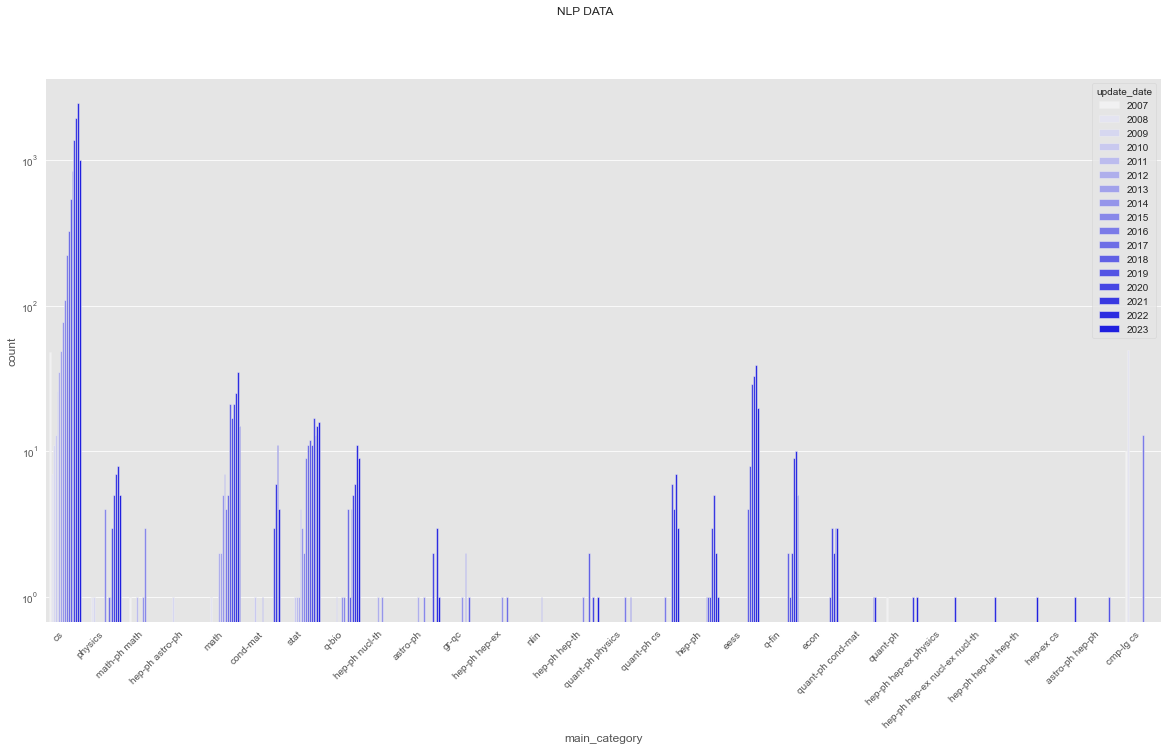

In [151]:
fig,ax=plt.subplots(figsize=(20,10))
fig.suptitle("NLP DATA")
sns.countplot(data=df_all_nlp,x='main_category',ax=ax,hue='update_date',color='b')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


### Climate change data

Interesting -> 20 main_categories for a 8 times smaller dataset (compared to NLP, which had 28)!

In [153]:
df_all_climate['main_category'].nunique()

20

In [155]:
len([vc for vc in df_all_climate['main_category'].value_counts() if vc<=2])

8

[Text(0, 0, 'physics'),
 Text(1, 0, 'astro-ph physics'),
 Text(2, 0, 'q-bio'),
 Text(3, 0, 'astro-ph nlin'),
 Text(4, 0, 'astro-ph'),
 Text(5, 0, 'math'),
 Text(6, 0, 'cs'),
 Text(7, 0, 'stat'),
 Text(8, 0, 'q-fin'),
 Text(9, 0, 'quant-ph cond-mat'),
 Text(10, 0, 'econ'),
 Text(11, 0, 'eess'),
 Text(12, 0, 'cond-mat'),
 Text(13, 0, 'quant-ph'),
 Text(14, 0, 'nlin'),
 Text(15, 0, 'ao-sci cond-mat physics'),
 Text(16, 0, 'hep-ex hep-ph'),
 Text(17, 0, 'math-ph math'),
 Text(18, 0, 'hep-lat nucl-th physics'),
 Text(19, 0, 'quant-ph cs')]

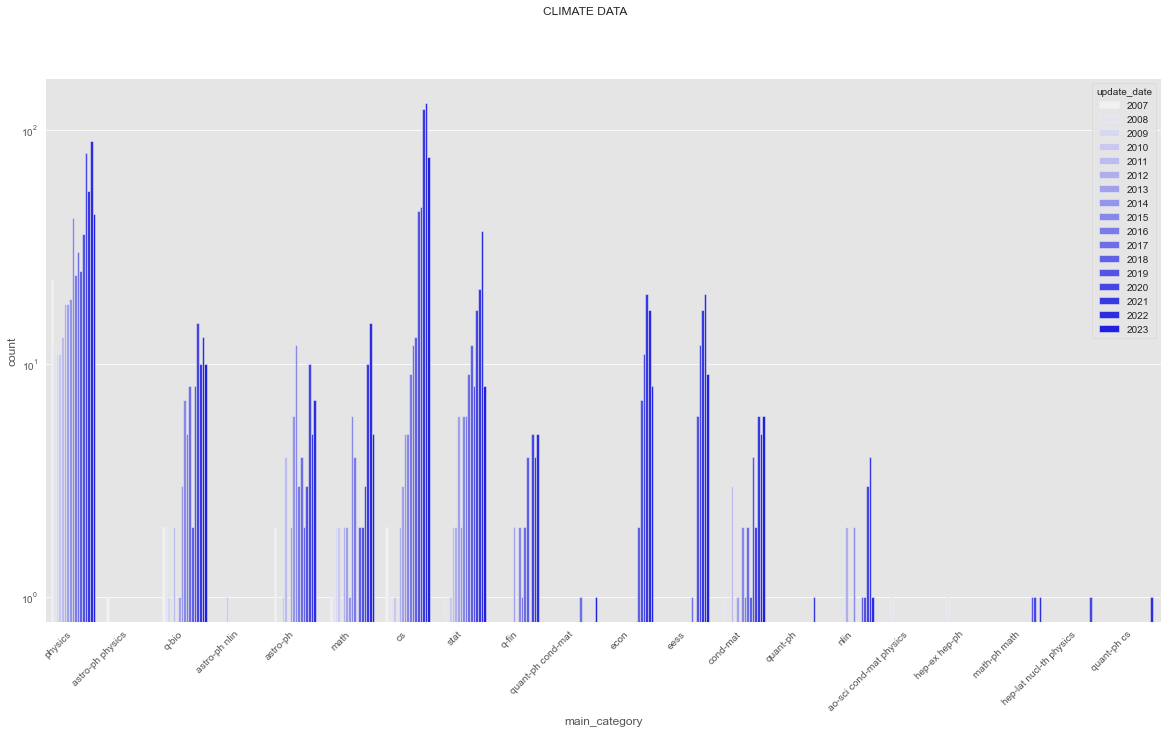

In [154]:
fig,ax=plt.subplots(figsize=(20,10))
fig.suptitle("CLIMATE DATA")
sns.countplot(data=df_all_climate,x='main_category',ax=ax,hue='update_date',color='b')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


When we discuss what to do with the categories , I will save the updated dataframeds with this information and post it on github!